# Pandas

Beyond ML,..., python has data allowing complex data manipulation. Dealing w/ data is the most difficult: scrubbinf, gathering, etc.
The `numpy` module is excellent for numerical computations, but to handle missing data or arrays with mixed types takes more work. The `pandas` module is currently the most widely used tool for data manipulation, providing high-performance, easy-to-use data structures and advanced data analysis tools.

In particular `pandas` features (extending func of numpy to handle etherogenous data):

* A fast and efficient "DataFrame"(Panda's core) object for data manipulation with integrated indexing (fancy indexing);
* Tools for reading and writing data between in-memory data structures and different formats (CSV, Excel, SQL, HDF5);
* Intelligent data alignment and integrated handling of missing data (in some places ex. given sensor not recording). Numpy is not useful for missing data;
* Intelligent label-based slicing, fancy indexing, and subsetting of large data sets;
* Database-kind of operations: Aggregating or transforming data with a powerful "group-by" engine + high performance merging and joining of data sets (in backend = but frendly in fronend);
* Ops performed column-wise ("clmn pace") like operations among homog records from sensor (features/variables): pres_clm*temp_clm=const more efficiently than "for"-loop for every element cfr late 
* Hierarchical axis indexing (see later) provides an intuitive way of working with high-dimensional data in a lower-dimensional data structure;
* Time series-functionalities from economics, geophysics,epidemic (see Adv Complex Systems);
* Highly optimized for performance, with critical code paths written in Cython or C.

"Distributed Data frame" can be distributed in a cluster of pcs, i.e. nodes really big data application (we see here the basics)
Efficient calculus for dataset

In [1]:
import pandas as pd
import numpy as np

## Series

Data frame ~ excel table w/ labelled rows(letters, time stamp), clmn(feat) -> single cml = series=gen numpy.array
Gen of numpy.array w/ labeled index not ony 0,1,2...:
<br>Series are completely equivalent to 1D array but with axis labels and the possibility to store heterogeneous elements. Of paramount importance are the time-series, used to define time evolutions of a phenomenon. 

In [2]:
from string import ascii_lowercase as letters

# Creating a series, accessing indexes, values and values by their index 
#index is 1st letters
xs = pd.Series(np.arange(10)*0.5, index=tuple(letters[:10]))
print ("xs:", xs,'\n')
print ("xs indexes:",xs.index,'\n')
# Values of the Series are actually a numpy array
print ("xs values:", xs.values, type(xs.values),'\n')
#access values: kind of dics
print (xs['f'], xs.f, xs.h, '\n') #kind of dangerous if string w/ space or wrong formatted
print (xs[['d', 'f', 'h']], '\n') #list of indexes: series out of serie
print (type(xs[['d', 'f', 'h']]), '\n')

xs: a    0.0
b    0.5
c    1.0
d    1.5
e    2.0
f    2.5
g    3.0
h    3.5
i    4.0
j    4.5
dtype: float64 

xs indexes: Index(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j'], dtype='object') 

xs values: [0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5] <class 'numpy.ndarray'> 

2.5 2.5 3.5 

d    1.5
f    2.5
h    3.5
dtype: float64 

<class 'pandas.core.series.Series'> 



In [3]:
# Extracting elements and operations: same as numpy array
print (xs[:3],'\n')
print (xs[7:], '\n')
print (xs[::3], '\n') #all serie w/ step
print (xs[xs>3], '\n') #filtering and pass indeces
print (np.exp(xs), '\n') #opereations 
print (np.mean(xs), np.std(xs), '\n')

a    0.0
b    0.5
c    1.0
dtype: float64 

h    3.5
i    4.0
j    4.5
dtype: float64 

a    0.0
d    1.5
g    3.0
j    4.5
dtype: float64 

h    3.5
i    4.0
j    4.5
dtype: float64 

a     1.000000
b     1.648721
c     2.718282
d     4.481689
e     7.389056
f    12.182494
g    20.085537
h    33.115452
i    54.598150
j    90.017131
dtype: float64 

2.25 1.4361406616345072 



In [4]:
# Series can be created from python dictionary too: key=index
# Note that the elements can be whatever!
d = {'b' : 1, 'a' : 'cat', 'c' : [2,3]}
pd.Series(d)

b         1
a       cat
c    [2, 3]
dtype: object

A key difference between Series and nparray is that operations between Series automatically align the data based on label. Thus, you can write computations without considering whether the Series involved have the same labels.

In [76]:
s = pd.Series(np.random.randn(5), index=tuple(letters[:5]))
print(s)
#print(s[1:]); print(); print( s[:-1])
s = s[1:] + s[:-1] #s[:-1]: e "indexes" NaN; s[1:]: a "ind" NaN
print(s)

b   -0.023397
c    1.064830
d    0.992552
e    0.067480
dtype: float64

a    0.563393
b   -0.023397
c    1.064830
d    0.992552
dtype: float64
b   -0.046795
c    2.129660
d    1.985103
e         NaN
dtype: float64

a         NaN
b   -0.046795
c    2.129660
d    1.985103
dtype: float64


### Time series

Time series are very often used to profile the behaviour of a quantity as a function of time / which has a time stamp attach to. <br>
Pandas has a special index for that, `DateTimeIndex`, that can be created e.g. with the function `pd.data_range()`

In [6]:
#tons of way to format the time information
# to define a date, the datetime module is very useful
import datetime as dt
date = dt.date.today()
print(date)

date = dt.datetime(2020,11,9,14,45,10,15)
print (date)

# otherwise, several notations are interpreted too
date = 'Nov 9 2020'
# or alternatively
date = '9/11/2020 14:45:00'
print (date)

#date time object used as indexes 
days = pd.date_range(date, periods=7, freq='D')
print (days)

seconds = pd.date_range(date, periods=3600, freq='s') #3600 el
print (seconds)

2020-11-09
2020-11-09 14:45:10.000015
9/11/2020 14:45:00
DatetimeIndex(['2020-09-11 14:45:00', '2020-09-12 14:45:00',
               '2020-09-13 14:45:00', '2020-09-14 14:45:00',
               '2020-09-15 14:45:00', '2020-09-16 14:45:00',
               '2020-09-17 14:45:00'],
              dtype='datetime64[ns]', freq='D')
DatetimeIndex(['2020-09-11 14:45:00', '2020-09-11 14:45:01',
               '2020-09-11 14:45:02', '2020-09-11 14:45:03',
               '2020-09-11 14:45:04', '2020-09-11 14:45:05',
               '2020-09-11 14:45:06', '2020-09-11 14:45:07',
               '2020-09-11 14:45:08', '2020-09-11 14:45:09',
               ...
               '2020-09-11 15:44:50', '2020-09-11 15:44:51',
               '2020-09-11 15:44:52', '2020-09-11 15:44:53',
               '2020-09-11 15:44:54', '2020-09-11 15:44:55',
               '2020-09-11 15:44:56', '2020-09-11 15:44:57',
               '2020-09-11 15:44:58', '2020-09-11 15:44:59'],
              dtype='datetime64[ns]', lengt

To learn more about the frequency strings, please see this [link](http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases)


Timestamped data is the most basic type of time series data that associates values with points in time. For pandas objects it means using the points in time.

functions like `pd.to_datetime` can be used, for instance, when reading information as string from a dataset

In [7]:
#counter from 1st 1970
tstamp = pd.Timestamp(dt.datetime(2020, 11, 9))

# internally it counts the nanoseconds from January 1st 19
#tstamp = pd.Timestamp(dt.datetime(1970, 1, 1, 0, 0, 0, 1))
print(tstamp.value)

# when creating a timestamp the format can be explicitly passed
ts = pd.to_datetime('2010/11/12', format='%Y/%m/%d') #get this from txt and format is known
print (type(ts))
print (ts) #;print (ts.value)
ts = pd.to_datetime('12-11-2010 00:00', format='%d-%m-%Y %H:%M')
print (ts)
print (ts.value)



1604880000000000000
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
2010-11-12 00:00:00
2010-11-12 00:00:00
1289520000000000000


A standard series can be created and (range of) elements can be used as indexes

In [77]:
tseries = pd.Series(np.random.normal(10, 1, len(days)), index=days)
# Extracting elements
print (tseries[0:4], '\n')
print (tseries['2020-09-11':'2020-11-11'], '\n') # Note - includes end time // spec where to put month and day
#acces the element check theindt btw intervall (index as numbers) 

2020-09-11 14:45:00     8.038204
2020-09-12 14:45:00    10.023837
2020-09-13 14:45:00    11.855654
2020-09-14 14:45:00     8.499928
Freq: D, dtype: float64 

2020-09-11 14:45:00     8.038204
2020-09-12 14:45:00    10.023837
2020-09-13 14:45:00    11.855654
2020-09-14 14:45:00     8.499928
2020-09-15 14:45:00    10.823089
2020-09-16 14:45:00     9.641695
2020-09-17 14:45:00    10.127432
Freq: D, dtype: float64 



`pd.to_datetime` can also be used to create a `DatetimeIndex`:

In [9]:
pd.to_datetime([1, 2, 3, 4], unit='D', origin=pd.Timestamp('1980-02-03'))

DatetimeIndex(['1980-02-04', '1980-02-05', '1980-02-06', '1980-02-07'], dtype='datetime64[ns]', freq=None)

## DataFrame

A pandas DataFrame is like a simple tabular spreadsheet. For future reference (DataF already made for R), a pandas DataFrame is very similar to the R DataFrame.
Record has the same features and Pandas allows more thing wrt Excel.

Each feat/column in a DataFrame is a Series object.
Put togheter more clmn/series/relevantFeat4DataAn to have  DataFrame

The element can be whatever, missing data are dealt with too (as NaN)

Need same structure for every records/feature/column but may be missing item which is treated as NaN   

### DataFrame 

DF may be created from != fiels but every record has to be formatted in the same way (not a drawback since set of var is well def). <br>In HEP you don't know how may variable you have per record so use root.

A DataFrame can be created implicitly, with, e.g., a DatatimeIndex object as index:

In [78]:
entries=10 #records
dates=pd.date_range('11/9/2020 14:45:00',freq='h', periods=entries)
df = pd.DataFrame(np.random.randn(entries,4), index=dates, columns=['A','B','C','D'])
df #or worsening print(df)
#ex. ML, you know before the feature/var ( ABCD = press, hum, temp, air) to play with


,A,B,C,D
2020-11-09 14:45:00,-0.747717,-1.736552,-0.700305,-0.600943
2020-11-09 15:45:00,0.070782,-0.992585,0.896847,2.080158
2020-11-09 16:45:00,1.818368,-0.306104,-2.862112,0.442335
2020-11-09 17:45:00,1.539707,-0.829911,0.588796,0.114271
2020-11-09 18:45:00,1.033784,-0.289766,1.058656,-0.228364
2020-11-09 19:45:00,1.834907,0.346249,-0.840323,1.266886
2020-11-09 20:45:00,0.723996,-1.473271,0.308678,-0.128692
2020-11-09 21:45:00,-0.097182,1.130341,0.066315,1.130486
2020-11-09 22:45:00,-0.152548,0.389230,0.140224,0.165104
2020-11-09 23:45:00,0.810909,-0.584381,-0.197379,1.930188


or by means of a dictionary:


In [11]:
 df2 = pd.DataFrame(
    { 'A' : 1., #A labels of column, 1 repeated as many as is neede
      'B' : pd.Timestamp('20130102'),
      'C' : pd.Series(1,index=range(4),dtype='float32'),
      'D' : np.arange(7,11),
      'E' : pd.Categorical(["test","train","test","train"]), #typical division for training datasets ex 0,1
    }
    )
df2

,A,B,C,D,E
0,1.0,2013-01-02,1.0,7,test
1,1.0,2013-01-02,1.0,8,train
2,1.0,2013-01-02,1.0,9,test
3,1.0,2013-01-02,1.0,10,train


### Viewing Data

Milion entries -> a way to inspect is usefull

In [79]:
df.head()

,A,B,C,D
2020-11-09 14:45:00,-0.747717,-1.736552,-0.700305,-0.600943
2020-11-09 15:45:00,0.070782,-0.992585,0.896847,2.080158
2020-11-09 16:45:00,1.818368,-0.306104,-2.862112,0.442335
2020-11-09 17:45:00,1.539707,-0.829911,0.588796,0.114271
2020-11-09 18:45:00,1.033784,-0.289766,1.058656,-0.228364


In [80]:
df.tail(4)

,A,B,C,D
2020-11-09 20:45:00,0.723996,-1.473271,0.308678,-0.128692
2020-11-09 21:45:00,-0.097182,1.130341,0.066315,1.130486
2020-11-09 22:45:00,-0.152548,0.389230,0.140224,0.165104
2020-11-09 23:45:00,0.810909,-0.584381,-0.197379,1.930188


In [81]:
df.index

DatetimeIndex(['2020-11-09 14:45:00', '2020-11-09 15:45:00',
               '2020-11-09 16:45:00', '2020-11-09 17:45:00',
               '2020-11-09 18:45:00', '2020-11-09 19:45:00',
               '2020-11-09 20:45:00', '2020-11-09 21:45:00',
               '2020-11-09 22:45:00', '2020-11-09 23:45:00'],
              dtype='datetime64[ns]', freq='H')

In [82]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [83]:
df.values

array([[-0.74771729, -1.73655171, -0.70030464, -0.60094264],
       [ 0.0707822 , -0.99258482,  0.89684659,  2.08015783],
       [ 1.81836771, -0.30610435, -2.86211185,  0.44233499],
       [ 1.53970669, -0.82991082,  0.5887962 ,  0.11427099],
       [ 1.03378395, -0.2897655 ,  1.05865555, -0.22836425],
       [ 1.83490695,  0.34624923, -0.8403232 ,  1.26688634],
       [ 0.72399568, -1.47327122,  0.30867768, -0.12869197],
       [-0.0971822 ,  1.13034104,  0.06631458,  1.13048623],
       [-0.15254799,  0.38922986,  0.14022433,  0.16510386],
       [ 0.81090906, -0.58438092, -0.1973795 ,  1.93018833]])

In [84]:
df.describe()

,A,B,C,D
count,10.000000,10.000000,10.000000,10.000000
mean,0.683500,-0.434675,-0.154060,0.617143
std,0.895642,0.884365,1.134361,0.930523
min,-0.747717,-1.736552,-2.862112,-0.600943
25%,-0.055191,-0.951916,-0.574573,-0.067951
50%,0.767452,-0.445243,0.103269,0.303719
75%,1.413226,0.187246,0.518767,1.232786
max,1.834907,1.130341,1.058656,2.080158


In [18]:
df.T  #similar to lin alg

,2020-11-09 14:45:00,2020-11-09 15:45:00,2020-11-09 16:45:00,2020-11-09 17:45:00,2020-11-09 18:45:00,2020-11-09 19:45:00,2020-11-09 20:45:00,2020-11-09 21:45:00,2020-11-09 22:45:00,2020-11-09 23:45:00
A,-1.855009,0.071000,0.528860,1.649121,0.312406,0.333972,0.843352,-0.261005,0.915150,0.151093
B,0.802328,0.001009,0.106881,-1.511636,-0.329453,0.840032,1.615081,1.390226,-0.482330,1.037597
C,-0.888559,0.317134,-0.394401,-0.164358,-0.913570,-0.258901,0.179771,1.670598,1.011002,-0.889745
D,1.105591,1.297629,0.913631,1.003196,-0.873869,-0.124309,0.192749,-0.394402,-0.072288,-0.385739


In [87]:
df.sort_index(axis=1,ascending=True) #std excel op: sort clm in alphab

,A,B,C,D
2020-11-09 14:45:00,-0.747717,-1.736552,-0.700305,-0.600943
2020-11-09 15:45:00,0.070782,-0.992585,0.896847,2.080158
2020-11-09 16:45:00,1.818368,-0.306104,-2.862112,0.442335
2020-11-09 17:45:00,1.539707,-0.829911,0.588796,0.114271
2020-11-09 18:45:00,1.033784,-0.289766,1.058656,-0.228364
2020-11-09 19:45:00,1.834907,0.346249,-0.840323,1.266886
2020-11-09 20:45:00,0.723996,-1.473271,0.308678,-0.128692
2020-11-09 21:45:00,-0.097182,1.130341,0.066315,1.130486
2020-11-09 22:45:00,-0.152548,0.389230,0.140224,0.165104
2020-11-09 23:45:00,0.810909,-0.584381,-0.197379,1.930188


In [20]:
df.sort_values(by="C") #sort accordingly to C, isn't working??

,A,B,C,D
2020-11-09 18:45:00,0.312406,-0.329453,-0.913570,-0.873869
2020-11-09 23:45:00,0.151093,1.037597,-0.889745,-0.385739
2020-11-09 14:45:00,-1.855009,0.802328,-0.888559,1.105591
2020-11-09 16:45:00,0.528860,0.106881,-0.394401,0.913631
2020-11-09 19:45:00,0.333972,0.840032,-0.258901,-0.124309
2020-11-09 17:45:00,1.649121,-1.511636,-0.164358,1.003196
2020-11-09 20:45:00,0.843352,1.615081,0.179771,0.192749
2020-11-09 15:45:00,0.071000,0.001009,0.317134,1.297629
2020-11-09 22:45:00,0.915150,-0.482330,1.011002,-0.072288
2020-11-09 21:45:00,-0.261005,1.390226,1.670598,-0.394402


## Selection

DF well posed -> make ops

### Getting slices

The following show how to get part of the DataFrame (i.e. not just the elements)

In [21]:
## standard and safe
print (df['A'],'\n')

## equivalent but dangerous (imagine blank spaces in the name of the column..)
print (df.A) #if "A"->"A is not well posed"

2020-11-09 14:45:00   -1.855009
2020-11-09 15:45:00    0.071000
2020-11-09 16:45:00    0.528860
2020-11-09 17:45:00    1.649121
2020-11-09 18:45:00    0.312406
2020-11-09 19:45:00    0.333972
2020-11-09 20:45:00    0.843352
2020-11-09 21:45:00   -0.261005
2020-11-09 22:45:00    0.915150
2020-11-09 23:45:00    0.151093
Freq: H, Name: A, dtype: float64 

2020-11-09 14:45:00   -1.855009
2020-11-09 15:45:00    0.071000
2020-11-09 16:45:00    0.528860
2020-11-09 17:45:00    1.649121
2020-11-09 18:45:00    0.312406
2020-11-09 19:45:00    0.333972
2020-11-09 20:45:00    0.843352
2020-11-09 21:45:00   -0.261005
2020-11-09 22:45:00    0.915150
2020-11-09 23:45:00    0.151093
Freq: H, Name: A, dtype: float64


In [22]:
# selecting rows by counting for ex. fixing time interval
print (df[0:3])

# or by index: explicetely mentioning the boundaries
print (df["2020-11-09 14:45:00":"2020-11-09 16:45:00"])

                            A         B         C         D
2020-11-09 14:45:00 -1.855009  0.802328 -0.888559  1.105591
2020-11-09 15:45:00  0.071000  0.001009  0.317134  1.297629
2020-11-09 16:45:00  0.528860  0.106881 -0.394401  0.913631
                            A         B         C         D
2020-11-09 14:45:00 -1.855009  0.802328 -0.888559  1.105591
2020-11-09 15:45:00  0.071000  0.001009  0.317134  1.297629
2020-11-09 16:45:00  0.528860  0.106881 -0.394401  0.913631


### Selection by label

In [23]:
# getting a cross section (part of the DataFrame) using a label
df.loc[dates[0]] #1st record but uses [] not () as expected for a method

A   -1.855009
B    0.802328
C   -0.888559
D    1.105591
Name: 2020-11-09 14:45:00, dtype: float64

In [133]:
# selecting on a multi-axis by label row&column-sel:
df.loc[:,['A','B']]
print()
a=df.loc[:,['A','C']]; a[0:1]=3
print("a", a[0:1]); print(); print( df.loc["2020-11-09 14:45:00"]) #this is a COPY


a                        A    C
2020-11-09 14:45:00  3.0  3.0

A   -0.747717
B   -1.736552
C   -0.700305
D   -0.600943
Name: 2020-11-09 14:45:00, dtype: float64


In [25]:
# showing label slicing, both endpoints are included:
df.loc['2020-11-09 18:45:00':'2020-11-09 20:45:00',['A','B']]

,A,B
2020-11-09 18:45:00,0.312406,-0.329453
2020-11-09 19:45:00,0.333972,0.840032
2020-11-09 20:45:00,0.843352,1.615081


In [26]:
# getting an individual element
print (df.loc[dates[1],'A'])

# equivalently fix pos and time
print (df.at[dates[1],'A']) 

0.0710002883025995
0.0710002883025995


### Selecting by position

In [89]:
# select via the position of the passed integers:
print (df.iloc[3],'\n') #4th rows

# notation similar to numpy/python 2x2 matrix
print (df.iloc[3:5,0:2])

A    1.539707
B   -0.829911
C    0.588796
D    0.114271
Name: 2020-11-09 17:45:00, dtype: float64 

                            A         B
2020-11-09 17:45:00  1.539707 -0.829911
2020-11-09 18:45:00  1.033784 -0.289766


In [28]:
# selecting raws 1,2 and 4 for columns 0 and 2
df.iloc[[1,2,4],[0,2]]

,A,C
2020-11-09 15:45:00,0.071000,0.317134
2020-11-09 16:45:00,0.528860,-0.394401
2020-11-09 18:45:00,0.312406,-0.913570


In [29]:
#Cared about if a meth is return a 
#loc returns a copy (see above) & operates in 
#iloc return view/ref & operates in indices 
# slicing rows explicitly
print (df.iloc[1:3,:],'\n')

# slicing columns explicitly
print (df.iloc[:,1:3])

                           A         B         C         D
2020-11-09 15:45:00  0.07100  0.001009  0.317134  1.297629
2020-11-09 16:45:00  0.52886  0.106881 -0.394401  0.913631 

                            B         C
2020-11-09 14:45:00  0.802328 -0.888559
2020-11-09 15:45:00  0.001009  0.317134
2020-11-09 16:45:00  0.106881 -0.394401
2020-11-09 17:45:00 -1.511636 -0.164358
2020-11-09 18:45:00 -0.329453 -0.913570
2020-11-09 19:45:00  0.840032 -0.258901
2020-11-09 20:45:00  1.615081  0.179771
2020-11-09 21:45:00  1.390226  1.670598
2020-11-09 22:45:00 -0.482330  1.011002
2020-11-09 23:45:00  1.037597 -0.889745


In [30]:
# selecting an individual element by position
df.iloc[1,1]
df.iat[1,1]


0.0010089841405620757

### Boolean index

Very powerful way of filtering out data with certain features. Notation is very similar to numpy arrays.

In [31]:
# Filter by a boolean condition on the values of a single column
#select only the measure w/ T <0
df[df['B'] > 0] #boolean selection

,A,B,C,D
2020-11-09 14:45:00,-1.855009,0.802328,-0.888559,1.105591
2020-11-09 15:45:00,0.071000,0.001009,0.317134,1.297629
2020-11-09 16:45:00,0.528860,0.106881,-0.394401,0.913631
2020-11-09 19:45:00,0.333972,0.840032,-0.258901,-0.124309
2020-11-09 20:45:00,0.843352,1.615081,0.179771,0.192749
2020-11-09 21:45:00,-0.261005,1.390226,1.670598,-0.394402
2020-11-09 23:45:00,0.151093,1.037597,-0.889745,-0.385739


In [32]:
# Selecting on the basis of boolean conditions applied to the whole DataFrame
df[df>0]  #!= of before is NaN in the corrisponding entry

# a DataFrame with the same shape is returned, with NaN's where condition is not met

,A,B,C,D
2020-11-09 14:45:00,NaN,0.802328,NaN,1.105591
2020-11-09 15:45:00,0.071000,0.001009,0.317134,1.297629
2020-11-09 16:45:00,0.528860,0.106881,NaN,0.913631
2020-11-09 17:45:00,1.649121,NaN,NaN,1.003196
2020-11-09 18:45:00,0.312406,NaN,NaN,NaN
2020-11-09 19:45:00,0.333972,0.840032,NaN,NaN
2020-11-09 20:45:00,0.843352,1.615081,0.179771,0.192749
2020-11-09 21:45:00,NaN,1.390226,1.670598,NaN
2020-11-09 22:45:00,0.915150,NaN,1.011002,NaN
2020-11-09 23:45:00,0.151093,1.037597,NaN,NaN


### Setting

Manipulate DF
Combination of selection and setting of values

In [134]:
# setting values by label (same as by position)
df.at[dates[0],'A'] = 0

# setting and assigning a numpy array; 4all entries in var D -> array of 5ves
df.loc[:,'D'] = np.array([5] * len(df))

# defining a brend new column~ new variable added autom
df['E'] = np.arange(len(df))*0.5

# defining a brend new column by means of a pd.Series: indexes must be the same!
df['E prime'] = pd.Series(np.arange(len(df))*2, index=df.index)


In [135]:
#fancy: apply cosine to a clmn
def dcos(theta):
    theta = theta*(np.pi/180)
    return np.cos(theta)
 
df['cosine'] = pd.Series(df["E"].apply(dcos), index=df.index)
df

#edit A, D=5, E frm 1 to 9 *.5, cosine

,A,B,C,D,E,E prime,cosine
2020-11-09 14:45:00,0.000000,-1.736552,-0.700305,5,0.0,0,1.000000
2020-11-09 15:45:00,0.070782,-0.992585,0.896847,5,0.5,2,0.999962
2020-11-09 16:45:00,1.818368,-0.306104,-2.862112,5,1.0,4,0.999848
2020-11-09 17:45:00,1.539707,-0.829911,0.588796,5,1.5,6,0.999657
2020-11-09 18:45:00,1.033784,-0.289766,1.058656,5,2.0,8,0.999391
2020-11-09 19:45:00,1.834907,0.346249,-0.840323,5,2.5,10,0.999048
2020-11-09 20:45:00,0.723996,-1.473271,0.308678,5,3.0,12,0.998630
2020-11-09 21:45:00,-0.097182,1.130341,0.066315,5,3.5,14,0.998135
2020-11-09 22:45:00,-0.152548,0.389230,0.140224,5,4.0,16,0.997564
2020-11-09 23:45:00,0.810909,-0.584381,-0.197379,5,4.5,18,0.996917


In [137]:
# another example of global setting
df2=df#.copy() # not use .copy but = only so makin a copy also
df2[df2>0] = -df2
df2

,A,B,C,D,E,E prime,cosine
2020-11-09 14:45:00,0.000000,-1.736552,-0.700305,-5,0.0,0,-1.000000
2020-11-09 15:45:00,-0.070782,-0.992585,-0.896847,-5,-0.5,-2,-0.999962
2020-11-09 16:45:00,-1.818368,-0.306104,-2.862112,-5,-1.0,-4,-0.999848
2020-11-09 17:45:00,-1.539707,-0.829911,-0.588796,-5,-1.5,-6,-0.999657
2020-11-09 18:45:00,-1.033784,-0.289766,-1.058656,-5,-2.0,-8,-0.999391
2020-11-09 19:45:00,-1.834907,-0.346249,-0.840323,-5,-2.5,-10,-0.999048
2020-11-09 20:45:00,-0.723996,-1.473271,-0.308678,-5,-3.0,-12,-0.998630
2020-11-09 21:45:00,-0.097182,-1.130341,-0.066315,-5,-3.5,-14,-0.998135
2020-11-09 22:45:00,-0.152548,-0.389230,-0.140224,-5,-4.0,-16,-0.997564
2020-11-09 23:45:00,-0.810909,-0.584381,-0.197379,-5,-4.5,-18,-0.996917


In [136]:
df

,A,B,C,D,E,E prime,cosine
2020-11-09 14:45:00,0.000000,-1.736552,-0.700305,5,0.0,0,1.000000
2020-11-09 15:45:00,0.070782,-0.992585,0.896847,5,0.5,2,0.999962
2020-11-09 16:45:00,1.818368,-0.306104,-2.862112,5,1.0,4,0.999848
2020-11-09 17:45:00,1.539707,-0.829911,0.588796,5,1.5,6,0.999657
2020-11-09 18:45:00,1.033784,-0.289766,1.058656,5,2.0,8,0.999391
2020-11-09 19:45:00,1.834907,0.346249,-0.840323,5,2.5,10,0.999048
2020-11-09 20:45:00,0.723996,-1.473271,0.308678,5,3.0,12,0.998630
2020-11-09 21:45:00,-0.097182,1.130341,0.066315,5,3.5,14,0.998135
2020-11-09 22:45:00,-0.152548,0.389230,0.140224,5,4.0,16,0.997564
2020-11-09 23:45:00,0.810909,-0.584381,-0.197379,5,4.5,18,0.996917


### Dropping

Use some temporary clmn and then drop it
N.B.: dropping doesn't act permanently on the DataFrame, i.e. to get that do :
```python
df = df.drop(....)
```

In [141]:
# Dropping by column
df.drop(['E prime'], axis=1)

#which is equivalent to
df.drop(columns=['E prime'])
#df #Drop this is a copy not a view, i.e. df contains E'

,A,B,C,D,E,E prime,cosine
2020-11-09 14:45:00,0.000000,-1.736552,-0.700305,-5,0.0,0,-1.000000
2020-11-09 15:45:00,-0.070782,-0.992585,-0.896847,-5,-0.5,-2,-0.999962
2020-11-09 16:45:00,-1.818368,-0.306104,-2.862112,-5,-1.0,-4,-0.999848
2020-11-09 17:45:00,-1.539707,-0.829911,-0.588796,-5,-1.5,-6,-0.999657
2020-11-09 18:45:00,-1.033784,-0.289766,-1.058656,-5,-2.0,-8,-0.999391
2020-11-09 19:45:00,-1.834907,-0.346249,-0.840323,-5,-2.5,-10,-0.999048
2020-11-09 20:45:00,-0.723996,-1.473271,-0.308678,-5,-3.0,-12,-0.998630
2020-11-09 21:45:00,-0.097182,-1.130341,-0.066315,-5,-3.5,-14,-0.998135
2020-11-09 22:45:00,-0.152548,-0.389230,-0.140224,-5,-4.0,-16,-0.997564
2020-11-09 23:45:00,-0.810909,-0.584381,-0.197379,-5,-4.5,-18,-0.996917


In [37]:
# Dropping by raws
# safe and always working
df.drop(df.index[[1,2,3,4]])

,A,B,C,D,E,E prime,cosine
2020-11-09 14:45:00,0.000000,0.802328,-0.888559,5,0.0,0,1.000000
2020-11-09 19:45:00,0.333972,0.840032,-0.258901,5,2.5,10,0.999048
2020-11-09 20:45:00,0.843352,1.615081,0.179771,5,3.0,12,0.998630
2020-11-09 21:45:00,-0.261005,1.390226,1.670598,5,3.5,14,0.998135
2020-11-09 22:45:00,0.915150,-0.482330,1.011002,5,4.0,16,0.997564
2020-11-09 23:45:00,0.151093,1.037597,-0.889745,5,4.5,18,0.996917


In [38]:
# something like df.drop('index_name') 
# would work but the type of index must be specificed, 
# in particular with DatetimeIndex
df.drop(pd.to_datetime("2020-11-09 22:45:00"))

,A,B,C,D,E,E prime,cosine
2020-11-09 14:45:00,0.000000,0.802328,-0.888559,5,0.0,0,1.000000
2020-11-09 15:45:00,0.071000,0.001009,0.317134,5,0.5,2,0.999962
2020-11-09 16:45:00,0.528860,0.106881,-0.394401,5,1.0,4,0.999848
2020-11-09 17:45:00,1.649121,-1.511636,-0.164358,5,1.5,6,0.999657
2020-11-09 18:45:00,0.312406,-0.329453,-0.913570,5,2.0,8,0.999391
2020-11-09 19:45:00,0.333972,0.840032,-0.258901,5,2.5,10,0.999048
2020-11-09 20:45:00,0.843352,1.615081,0.179771,5,3.0,12,0.998630
2020-11-09 21:45:00,-0.261005,1.390226,1.670598,5,3.5,14,0.998135
2020-11-09 23:45:00,0.151093,1.037597,-0.889745,5,4.5,18,0.996917


## Missing data

pandas primarily uses the value np.nan to represent missing data. It is by default not included in computations.

In [39]:
df_wNan = df[df>0]
df_wNan
#NaN is really "void"~floating point rep saturanting matissa, exp,...
#only 20.45 has all valid records

,A,B,C,D,E,E prime,cosine
2020-11-09 14:45:00,NaN,0.802328,NaN,5,NaN,NaN,1.000000
2020-11-09 15:45:00,0.071000,0.001009,0.317134,5,0.5,2.0,0.999962
2020-11-09 16:45:00,0.528860,0.106881,NaN,5,1.0,4.0,0.999848
2020-11-09 17:45:00,1.649121,NaN,NaN,5,1.5,6.0,0.999657
2020-11-09 18:45:00,0.312406,NaN,NaN,5,2.0,8.0,0.999391
2020-11-09 19:45:00,0.333972,0.840032,NaN,5,2.5,10.0,0.999048
2020-11-09 20:45:00,0.843352,1.615081,0.179771,5,3.0,12.0,0.998630
2020-11-09 21:45:00,NaN,1.390226,1.670598,5,3.5,14.0,0.998135
2020-11-09 22:45:00,0.915150,NaN,1.011002,5,4.0,16.0,0.997564
2020-11-09 23:45:00,0.151093,1.037597,NaN,5,4.5,18.0,0.996917


In [40]:
# dropping raws with at least a Nan
df_wNan.dropna(how='any')

,A,B,C,D,E,E prime,cosine
2020-11-09 15:45:00,0.071000,0.001009,0.317134,5,0.5,2.0,0.999962
2020-11-09 20:45:00,0.843352,1.615081,0.179771,5,3.0,12.0,0.998630


In [41]:
# getting a mask
df_wNan.isna()
#df_wNan.notna()

,A,B,C,D,E,E prime,cosine
2020-11-09 14:45:00,True,False,True,False,True,True,False
2020-11-09 15:45:00,False,False,False,False,False,False,False
2020-11-09 16:45:00,False,False,True,False,False,False,False
2020-11-09 17:45:00,False,True,True,False,False,False,False
2020-11-09 18:45:00,False,True,True,False,False,False,False
2020-11-09 19:45:00,False,False,True,False,False,False,False
2020-11-09 20:45:00,False,False,False,False,False,False,False
2020-11-09 21:45:00,True,False,False,False,False,False,False
2020-11-09 22:45:00,False,True,False,False,False,False,False
2020-11-09 23:45:00,False,False,True,False,False,False,False


In [42]:
# filling missing data, NaN <-> 0
df_wNan.fillna(value=0)

,A,B,C,D,E,E prime,cosine
2020-11-09 14:45:00,0.000000,0.802328,0.000000,5,0.0,0.0,1.000000
2020-11-09 15:45:00,0.071000,0.001009,0.317134,5,0.5,2.0,0.999962
2020-11-09 16:45:00,0.528860,0.106881,0.000000,5,1.0,4.0,0.999848
2020-11-09 17:45:00,1.649121,0.000000,0.000000,5,1.5,6.0,0.999657
2020-11-09 18:45:00,0.312406,0.000000,0.000000,5,2.0,8.0,0.999391
2020-11-09 19:45:00,0.333972,0.840032,0.000000,5,2.5,10.0,0.999048
2020-11-09 20:45:00,0.843352,1.615081,0.179771,5,3.0,12.0,0.998630
2020-11-09 21:45:00,0.000000,1.390226,1.670598,5,3.5,14.0,0.998135
2020-11-09 22:45:00,0.915150,0.000000,1.011002,5,4.0,16.0,0.997564
2020-11-09 23:45:00,0.151093,1.037597,0.000000,5,4.5,18.0,0.996917


Fill gaps forward or backward by propagating non-NA values forward or backward:

In [43]:
df_wNan.fillna(method='pad')

,A,B,C,D,E,E prime,cosine
2020-11-09 14:45:00,NaN,0.802328,NaN,5,NaN,NaN,1.000000
2020-11-09 15:45:00,0.071000,0.001009,0.317134,5,0.5,2.0,0.999962
2020-11-09 16:45:00,0.528860,0.106881,0.317134,5,1.0,4.0,0.999848
2020-11-09 17:45:00,1.649121,0.106881,0.317134,5,1.5,6.0,0.999657
2020-11-09 18:45:00,0.312406,0.106881,0.317134,5,2.0,8.0,0.999391
2020-11-09 19:45:00,0.333972,0.840032,0.317134,5,2.5,10.0,0.999048
2020-11-09 20:45:00,0.843352,1.615081,0.179771,5,3.0,12.0,0.998630
2020-11-09 21:45:00,0.843352,1.390226,1.670598,5,3.5,14.0,0.998135
2020-11-09 22:45:00,0.915150,1.390226,1.011002,5,4.0,16.0,0.997564
2020-11-09 23:45:00,0.151093,1.037597,1.011002,5,4.5,18.0,0.996917


## Operations

Here comes the most relevant advantage of DataFrame. Operations on columns are extremly fast, almost as fast as the actual operation between elements in a raw

In [44]:
# Some statistics (mean() just as an example)
# raws
print (df.mean(axis=0),'\n')
# columns is nonesens since there're not the same variable
print (df.mean(axis=1),'\n')

A          0.454395
B          0.346973
C         -0.033103
D          5.000000
E          2.250000
E prime    9.000000
cosine     0.998915
dtype: float64 

2020-11-09 14:45:00    0.844824
2020-11-09 15:45:00    1.269872
2020-11-09 16:45:00    1.605884
2020-11-09 17:45:00    1.924684
2020-11-09 18:45:00    2.152682
2020-11-09 19:45:00    2.773450
2020-11-09 20:45:00    3.376691
2020-11-09 21:45:00    3.756850
2020-11-09 22:45:00    3.920198
2020-11-09 23:45:00    4.113695
Freq: H, dtype: float64 



In [45]:
# global operations on columns
df.apply(np.cumsum)

,A,B,C,D,E,E prime,cosine
2020-11-09 14:45:00,0.000000,0.802328,-0.888559,5,0.0,0,1.000000
2020-11-09 15:45:00,0.071000,0.803337,-0.571425,10,0.5,2,1.999962
2020-11-09 16:45:00,0.599860,0.910218,-0.965826,15,1.5,6,2.999810
2020-11-09 17:45:00,2.248982,-0.601418,-1.130184,20,3.0,12,3.999467
2020-11-09 18:45:00,2.561388,-0.930871,-2.043754,25,5.0,20,4.998858
2020-11-09 19:45:00,2.895360,-0.090839,-2.302655,30,7.5,30,5.997906
2020-11-09 20:45:00,3.738712,1.524243,-2.122884,35,10.5,42,6.996536
2020-11-09 21:45:00,3.477707,2.914469,-0.452286,40,14.0,56,7.994670
2020-11-09 22:45:00,4.392856,2.432138,0.558716,45,18.0,72,8.992234
2020-11-09 23:45:00,4.543949,3.469735,-0.331029,50,22.5,90,9.989152


In [46]:
df #only making a copy

,A,B,C,D,E,E prime,cosine
2020-11-09 14:45:00,0.000000,0.802328,-0.888559,5,0.0,0,1.000000
2020-11-09 15:45:00,0.071000,0.001009,0.317134,5,0.5,2,0.999962
2020-11-09 16:45:00,0.528860,0.106881,-0.394401,5,1.0,4,0.999848
2020-11-09 17:45:00,1.649121,-1.511636,-0.164358,5,1.5,6,0.999657
2020-11-09 18:45:00,0.312406,-0.329453,-0.913570,5,2.0,8,0.999391
2020-11-09 19:45:00,0.333972,0.840032,-0.258901,5,2.5,10,0.999048
2020-11-09 20:45:00,0.843352,1.615081,0.179771,5,3.0,12,0.998630
2020-11-09 21:45:00,-0.261005,1.390226,1.670598,5,3.5,14,0.998135
2020-11-09 22:45:00,0.915150,-0.482330,1.011002,5,4.0,16,0.997564
2020-11-09 23:45:00,0.151093,1.037597,-0.889745,5,4.5,18,0.996917


In [47]:
df.apply(lambda x: x.max() - x.min()) #linear spread

A           1.910127
B           3.126717
C           2.584168
D           0.000000
E           4.500000
E prime    18.000000
cosine      0.003083
dtype: float64

In [48]:
# syntax is as usual similar to that of numpy arrays
df['A']+df['B']
#instead of doing loop do this

2020-11-09 14:45:00    0.802328
2020-11-09 15:45:00    0.072009
2020-11-09 16:45:00    0.635741
2020-11-09 17:45:00    0.137486
2020-11-09 18:45:00   -0.017047
2020-11-09 19:45:00    1.174004
2020-11-09 20:45:00    2.458434
2020-11-09 21:45:00    1.129220
2020-11-09 22:45:00    0.432819
2020-11-09 23:45:00    1.188690
Freq: H, dtype: float64

Let's play it hard and load (in memory) a (relatively) large dataset

In [142]:
#find out if it's right
# WARNING! link in past notebook was wrong!, (if needed) get the right file from:
#!wget https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt -P ~/data/

file_name="~/data/data_000637.txt"
data=pd.read_csv(file_name)
data

#DeepLearning w/ thousends of records for few variables(parameters) in order to describe that phenomena

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
0,1,0,123,3869200167,2374,26
1,1,0,124,3869200167,2374,27
2,1,0,63,3869200167,2553,28
3,1,0,64,3869200167,2558,19
4,1,0,64,3869200167,2760,25
...,...,...,...,...,...,...
1310715,1,0,62,3869211171,762,14
1310716,1,1,4,3869211171,763,11
1310717,1,0,64,3869211171,764,0
1310718,1,0,139,3869211171,769,0


Let's now do some operations among (elements of) columns

In [146]:
# the one-liner killing it all, create a clm and sum for 1.300.000 entries
data['timens']=data['TDC_MEAS']*25/30+data['BX_COUNTER']*25

In [148]:
data["timens"]

0          59371.666667
1          59372.500000
2          63848.333333
3          63965.833333
4          69020.833333
               ...     
1310715    19061.666667
1310716    19084.166667
1310717    19100.000000
1310718    19225.000000
1310719    19065.000000
Name: timens, Length: 1310720, dtype: float64

In [ ]:
# the old slooow way
def conversion(data):
    result=[]
    for i in range(len(data)): 
        result.append(data.loc[data.index[i],'TDC_MEAS']*25/30.+data.loc[data.index[i],'BX_COUNTER']*25)
    return result

data['timens']=conversion(data)

## Merge

pandas provides various facilities for easily combining together Series, DataFrame, and Panel objects with various kinds of set logic for the indexes and relational algebra functionality in the case of join / merge-type operations.

### Concat

concatenation (adding rows) is straightforward


In [52]:
rdf = pd.DataFrame(np.random.randn(10, 4))
rdf

,0,1,2,3
0,-1.122666,-0.969566,-0.515492,0.920251
1,-1.157960,-1.552776,-0.672703,-0.256669
2,0.333345,0.063155,-0.279992,0.391663
3,-1.115988,-1.084344,1.559590,0.836430
4,-0.264566,1.901961,-0.755860,0.023811
5,-0.547958,1.815851,0.793030,-0.338289
6,1.015997,0.586832,-0.645725,-0.608876
7,0.886014,0.521851,-1.776268,-0.724496
8,0.146559,0.559569,-0.411541,-0.186735
9,0.741828,-1.576887,-0.598853,-0.837702


In [53]:
# divide it into pieaces raw-wise
pieces = [rdf[:3], rdf[3:7], rdf[7:]]
pieces

[          0         1         2         3
 0 -1.122666 -0.969566 -0.515492  0.920251
 1 -1.157960 -1.552776 -0.672703 -0.256669
 2  0.333345  0.063155 -0.279992  0.391663,
           0         1         2         3
 3 -1.115988 -1.084344  1.559590  0.836430
 4 -0.264566  1.901961 -0.755860  0.023811
 5 -0.547958  1.815851  0.793030 -0.338289
 6  1.015997  0.586832 -0.645725 -0.608876,
           0         1         2         3
 7  0.886014  0.521851 -1.776268 -0.724496
 8  0.146559  0.559569 -0.411541 -0.186735
 9  0.741828 -1.576887 -0.598853 -0.837702]

In [54]:
# put it back together
#pd.concat(pieces)

# indexes can be ignored
pd.concat(pieces, ignore_index=True)

# in case of dimension mismatch, Nan are added where needed

,0,1,2,3
0,-1.122666,-0.969566,-0.515492,0.920251
1,-1.157960,-1.552776,-0.672703,-0.256669
2,0.333345,0.063155,-0.279992,0.391663
3,-1.115988,-1.084344,1.559590,0.836430
4,-0.264566,1.901961,-0.755860,0.023811
5,-0.547958,1.815851,0.793030,-0.338289
6,1.015997,0.586832,-0.645725,-0.608876
7,0.886014,0.521851,-1.776268,-0.724496
8,0.146559,0.559569,-0.411541,-0.186735
9,0.741828,-1.576887,-0.598853,-0.837702


In [55]:
# appending a single row (as a Series)
s = rdf.iloc[3]
rdf.append(s, ignore_index=True)
rdf

,0,1,2,3
0,-1.122666,-0.969566,-0.515492,0.920251
1,-1.157960,-1.552776,-0.672703,-0.256669
2,0.333345,0.063155,-0.279992,0.391663
3,-1.115988,-1.084344,1.559590,0.836430
4,-0.264566,1.901961,-0.755860,0.023811
5,-0.547958,1.815851,0.793030,-0.338289
6,1.015997,0.586832,-0.645725,-0.608876
7,0.886014,0.521851,-1.776268,-0.724496
8,0.146559,0.559569,-0.411541,-0.186735
9,0.741828,-1.576887,-0.598853,-0.837702


### Merge/Join

SQL like operations on table can be performed on DataFrames. This is all rather sophisticated, refer to the [doc](https://pandas.pydata.org/pandas-docs/stable/merging.html#merging) for more info/examples

In [56]:
left = pd.DataFrame({'key': ['foo', 'bar'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4, 5]})

pd.merge(left,right,on="key")

,key,lval,rval
0,foo,1,4
1,bar,2,5


## Grouping

By “group by” we are referring to a process involving one or more of the following steps:

* Splitting the data into groups based on some criteria
* Applying a function to each group independently
* Combining the results into a data structure


In [57]:
gdf = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
                          'foo', 'bar', 'foo', 'foo'],
                    'B' : ['one', 'one', 'two', 'three',
                           'two', 'two', 'one', 'three'],
                    'C' : np.random.randn(8),
                    'D' : np.random.randn(8)})
gdf

,A,B,C,D
0,foo,one,0.486557,0.281533
1,bar,one,0.295647,0.038745
2,foo,two,0.212023,0.070007
3,bar,three,-1.186578,-0.806163
4,foo,two,1.714239,-0.698313
5,bar,two,1.200341,0.659197
6,foo,one,1.539580,-0.123572
7,foo,three,0.994692,-0.335812


In [58]:
# Grouping and then applying the sum() 
# function to the resulting groups (effective only where number are there).
gdf.groupby('A').sum()

,C,D
A,,
bar,0.309409,-0.108221
foo,4.947092,-0.806156


## Multi-indexing


Hierarchical / Multi-level indexing allows sophisticated data analysis on higher dimensional data. In essence, it enables you to store and manipulate data with an arbitrary number of dimensions in lower dimensional data structures like Series (1d) and DataFrame (2d).

In [59]:
tuples = list(zip(['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux'],
          ['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two']))
multi_index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
print (multi_index,'\n')

s = pd.Series(np.random.randn(8), index=multi_index)
print (s)


MultiIndex([('bar', 'one'),
            ('bar', 'two'),
            ('baz', 'one'),
            ('baz', 'two'),
            ('foo', 'one'),
            ('foo', 'two'),
            ('qux', 'one'),
            ('qux', 'two')],
           names=['first', 'second']) 

first  second
bar    one      -0.536263
       two      -0.934995
baz    one      -1.255245
       two       0.647117
foo    one      -2.511382
       two       0.957189
qux    one       0.856557
       two      -0.550826
dtype: float64


In [60]:
# it enables further features of the groupby method,
# e.g. when group-by by multiple columns
gdf.groupby(['A','B']).sum()

C         D
A   B                        
bar one    0.295647  0.038745
    three -1.186578 -0.806163
    two    1.200341  0.659197
foo one    2.026137  0.157961
    three  0.994692 -0.335812
    two    1.926263 -0.628305

In [61]:
# stack() method “compresses” a level in the DataFrame’s columns
gdf.groupby(['A','B']).sum().stack()

A    B       
bar  one    C    0.295647
            D    0.038745
     three  C   -1.186578
            D   -0.806163
     two    C    1.200341
            D    0.659197
foo  one    C    2.026137
            D    0.157961
     three  C    0.994692
            D   -0.335812
     two    C    1.926263
            D   -0.628305
dtype: float64

## Plotting

Just a preview, more on the next lab class!

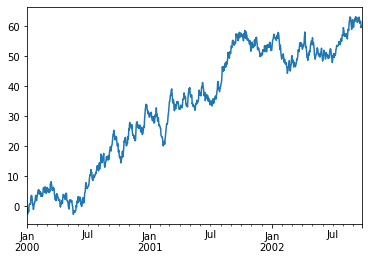

In [62]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts.cumsum().plot()

<Figure size 432x288 with 0 Axes>

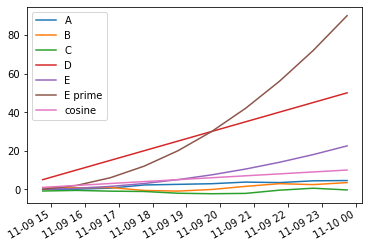

In [63]:
import matplotlib.pyplot as plt

pdf=pd.DataFrame(np.random.randn(1000, 4), index=ts.index,columns=['A', 'B', 'C', 'D'])
df = df.cumsum()
plt.figure(); df.plot(); plt.legend(loc='best')